In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, diff
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize

## Задание 1

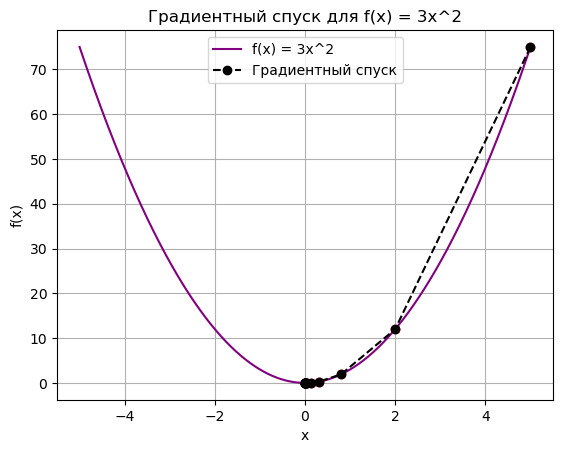

In [2]:
#обозначаем функцию
def f(x):
    return 3 * x**2
#обозначаем производную
def df(x):
    return 6 * x

#начальные параметры
x0 = 5 
lmbda = 0.1 
res = []  

while True:
    res.append((x0, f(x0)))
    x1 = x0 - lmbda * df(x0)
    if np.linalg.norm(x0 - x1) <= 0.000000001:
        break
    x0 = x1

#преобразование для построения
res_x, res_y = zip(*res)

x_fx = np.linspace(-5, 5, 1000)
y_fx = f(x_fx)

plt.plot(x_fx, y_fx, label="f(x) = 3x^2", color="purple")
plt.plot(res_x, res_y, color="black", marker="o", linestyle="--", label="Градиентный спуск")
plt.scatter(res_x, res_y, color="red")
plt.title("Градиентный спуск для f(x) = 3x^2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Задание 2.

In [3]:
#задаем функцию
def f(x, y):
    return 3 * x**2 + 5 * y**2

#задаем градиент
def grad_f(x, y):
    return np.array([6 * x, 10 * y])

#задаем начальные значения
x0 = np.array([5, 10])
lambda_ = 0.1
res = [] 

while True:
    res.append(np.append(x0, f(*x0)))
    x1 = x0 - lmbda * grad_f(*x0)   
    if np.linalg.norm(x1 - x0) <= 0.000000001:  
        break
    x0 = x1 

(x0-x1)**2

array([7.13053463e-19, 0.00000000e+00])

## Дополнительное задание

In [4]:
#задаем функцию
def f_3(x):
    return 3 * x**2

#определяем производную
def df_3(x):
    return 6 * x

#минимизируем
def func(lmbda, x0):
    return f_3(x0**(k-1)) - lmbda * df_3(x0**(k-1))

# Начальные значения
x0 = 5
result = []
l = 0.3
k = 1
while True: #количество итераций задано 100, чтобы цикл не выполнялся бесконечно
    res = minimize(func, l, args=(x0,), bounds=[(0, None)]) 
    lambda_ = (res.x[0]) ** 1/k

    result.append([x0, f_3(x0), l, k])
    x1 = x0 - l * df_3(x0)
    if np.linalg.norm(x0 - x1) <= 0.000000001:
        break

    x0 = x1
    k += 1

result_df = pd.DataFrame(result, columns=["x0", "f_3(x0)", "lambda", "k"])
result_df

,x0,f_3(x0),lambda,k
0,5.000000e+00,7.500000e+01,0.3,1
1,-4.000000e+00,4.800000e+01,0.3,2
2,3.200000e+00,3.072000e+01,0.3,3
3,-2.560000e+00,1.966080e+01,0.3,4
4,2.048000e+00,1.258291e+01,0.3,5
...,...,...,...,...
99,-1.273147e-09,4.862714e-18,0.3,100
100,1.018518e-09,3.112137e-18,0.3,101
101,-8.148144e-10,1.991767e-18,0.3,102
102,6.518515e-10,1.274731e-18,0.3,103


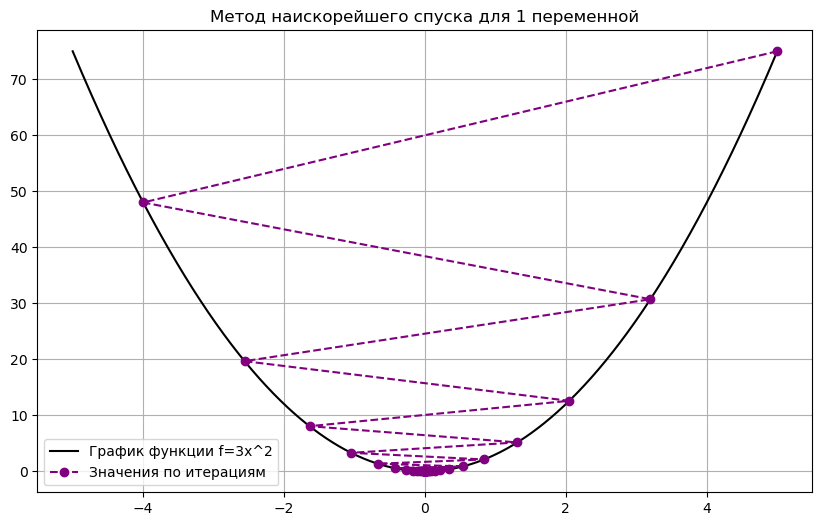

In [5]:
plt.figure(figsize=(10, 6))
x_f3 = np.linspace(-5, 5, 1000)
y_f3 = f_3(x_f3)
plt.plot(x_f3, y_f3, color = 'black', label='График функции f=3x^2')
plt.plot(result_df['x0'], result_df['f_3(x0)'], marker = "o", linestyle='--', color = 'purple', label='Значения по итерациям')
plt.title('Метод наискорейшего спуска для 1 переменной')
plt.legend(loc='best')
plt.grid(True)
plt.show()